#                                         ASSIGNMENT 4

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## 1. Load the dataset into python environment

In [2]:
df=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\DSA\Datasets\titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index('PassengerId',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [4]:
df.shape

(891, 11)

There are 891 rows and 11 columns in the dataset.

In [5]:
df.size

9801

There are total 9801 entries in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 2 float data type columns, 4 integer data type columns and 5 object data type columns. Also columns 'Age', 'Cabin' and 'Embarked' have null values.

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This is the statistical summary of the dataset.

## 4. Fill in all the missing values present in all the columns in the dataset

### Check for null values

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are 177 null values in column 'Age, 687 null values in column 'Cabin' and 2 null values in column 'Embarked'. Since the column 'Cabin' contains 77% null values, it will be better to drop the entire column itself instead of imputation.

In [9]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Since column 'Embarked' is a categotical data, use mode for missing value imputation.

### Check distribution type 

In [10]:
df.Age.skew()

0.38910778230082704

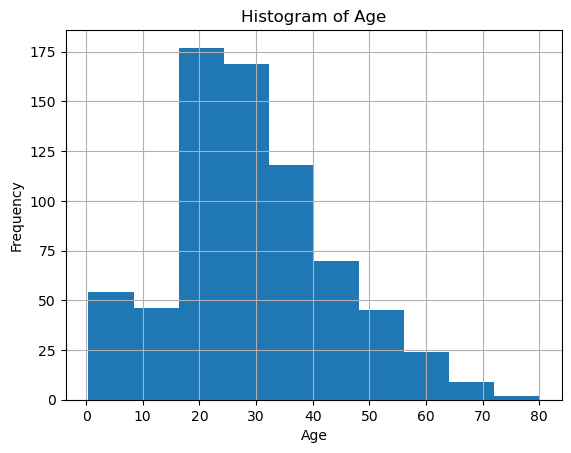

In [11]:
plt.title('Histogram of Age')
df.Age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Since column 'Age' is a skewed distribution, use median for imputation of missing values.

### Missing value imputation

In [12]:
df.Age=df.Age.fillna(df.Age.median())
df.Embarked=df.Embarked.fillna(df.Embarked.mode()[0])

### Check again for null values

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now there are no null values present in the dataset. All null values are imputed properly.

## 5. Check and handle outliers in at least 3 columns in the dataset

### Boxplot for checking outliers

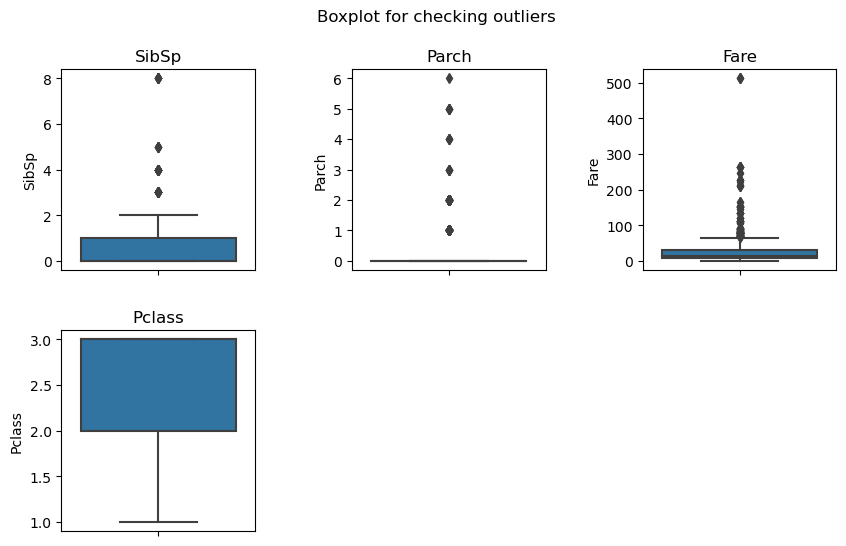

In [14]:
plt.suptitle('Boxplot for checking outliers')
plt.subplot(2,3,1)
sns.boxplot(y=df.SibSp)
plt.title('SibSp')
plt.subplot(2,3,2)
sns.boxplot(y=df.Parch)
plt.title('Parch')
plt.subplot(2,3,3)
sns.boxplot(y=df.Fare)
plt.title('Fare')
plt.subplot(2,3,4)
sns.boxplot(y=df.Pclass)
plt.title('Pclass')
plt.gcf().set_figheight(6)
plt.gcf().set_figwidth(10)
plt.subplots_adjust(wspace=.5)
plt.subplots_adjust(hspace=.3)
plt.show()

The columns 'SibSp', 'Parch' and 'Fare' have outliers.

### Check distribution type

In [15]:
df.SibSp.skew()

3.6953517271630565

In [16]:
df.Parch.skew()

2.7491170471010933

In [17]:
df.Fare.skew()

4.787316519674893

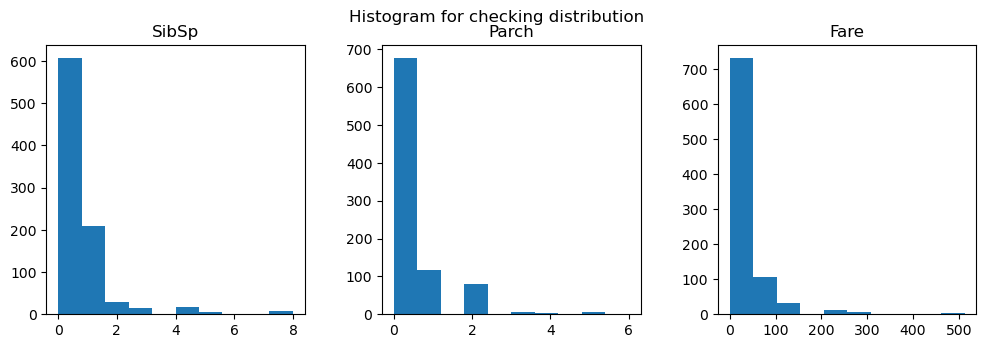

In [18]:
plt.suptitle('Histogram for checking distribution')
plt.subplot(1,3,1)
plt.hist(df.SibSp)
plt.title('SibSp')
plt.subplot(1,3,2)
plt.hist(df.Parch)
plt.title('Parch')
plt.subplot(1,3,3)
plt.hist(df.Fare)
plt.title('Fare')
plt.gcf().set_figheight(3.5)
plt.gcf().set_figwidth(12)
plt.subplots_adjust(wspace=.3)
plt.show()

All are right skewed distributions. So use IQR(Inter Quartile Range) method for outlier detection.

## IQR method for outlier detection and clip function for outlier handling

In [19]:
for i in ['SibSp','Parch','Fare']:
    Q1=np.percentile(df[i],25,method='midpoint')
    Q2=np.percentile(df[i],50,method='midpoint')
    Q3=np.percentile(df[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in df[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)    
    df[i]=df[i].clip(lower=low_lim,upper=up_lim)        

The detected outliers from IQR method are handled using clip function(i.e. Outliers which are greater than upper limit replaced with upper limit value and outliers which are less than lower limit replaced with lower limit value).

### Check again for outliers using boxplot

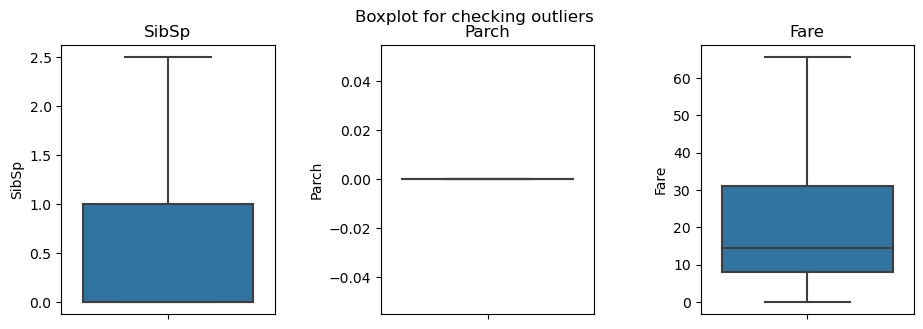

In [20]:
plt.suptitle('Boxplot for checking outliers')
plt.subplot(1,3,1)
sns.boxplot(y=df.SibSp)
plt.title('SibSp')
plt.subplot(1,3,2)
sns.boxplot(y=df.Parch)
plt.title('Parch')
plt.subplot(1,3,3)
sns.boxplot(y=df.Fare)
plt.title('Fare')
plt.gcf().set_figheight(3.5)
plt.gcf().set_figwidth(11)
plt.subplots_adjust(wspace=.5)
plt.show()

Outliers are removed.

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


Since the columns 'Name' and 'Ticket' does not contribute to predict our target variable 'Survived', we should not need to encode them. Encode columns 'Sex' and 'Embarked' before scaling.

### Label encoding

In [21]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,2


### Min max scaling

Dependent variable/ Target variable, Y - Survived

Independent variables/ predictors, X - Pclass, Sex, Age, SibSp, Parch, Fare, Embarked 

In [22]:
minmax=MinMaxScaler()
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm,columns=X.columns)

### Statistical summary before min max scaling

In [23]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.426487,0.0,24.046813,1.536476
std,0.836071,0.477990,13.019697,0.708246,0.0,20.481625,0.791503
min,1.000000,0.000000,0.420000,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.0,7.910400,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.0,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.0,31.000000,2.000000
max,3.000000,1.000000,80.000000,2.500000,0.0,65.634400,2.000000


### Statistical summary after min max scaling

In [24]:
X_mm.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,0.654321,0.647587,0.363679,0.170595,0.0,0.366375,0.768238
std,0.418036,0.477990,0.163605,0.283298,0.0,0.312056,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.500000,0.000000,0.271174,0.000000,0.0,0.120522,0.500000
50%,1.000000,1.000000,0.346569,0.000000,0.0,0.220223,1.000000
75%,1.000000,1.000000,0.434531,0.400000,0.0,0.472313,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Histogram - before and after min max scaling

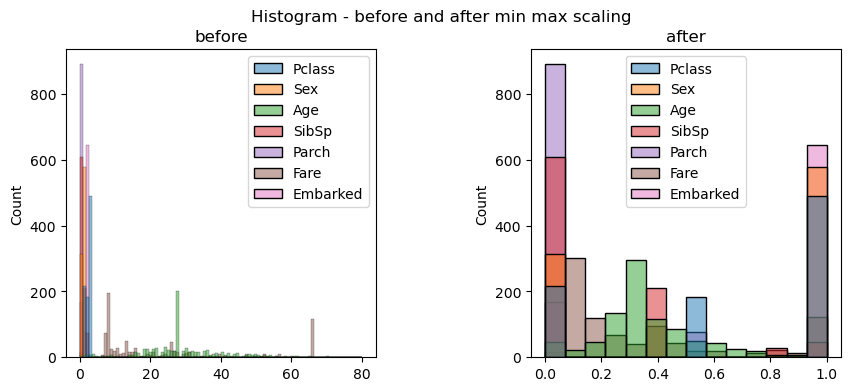

In [25]:
plt.suptitle('Histogram - before and after min max scaling')
plt.subplot(1,2,1)
plt.title('before')
sns.histplot(X)
plt.subplot(1,2,2)
plt.title('after')
sns.histplot(X_mm)
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(10)
plt.subplots_adjust(wspace=.5)
plt.show()

Data is squeezed in such a way that min=0 and max=1 after min max scaling.